In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("archive (3)", 
                                                    shuffle=True, 
                                                    image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE
                                                   )

Found 3171 files belonging to 4 classes.


In [7]:
class_names = dataset.class_names
# print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


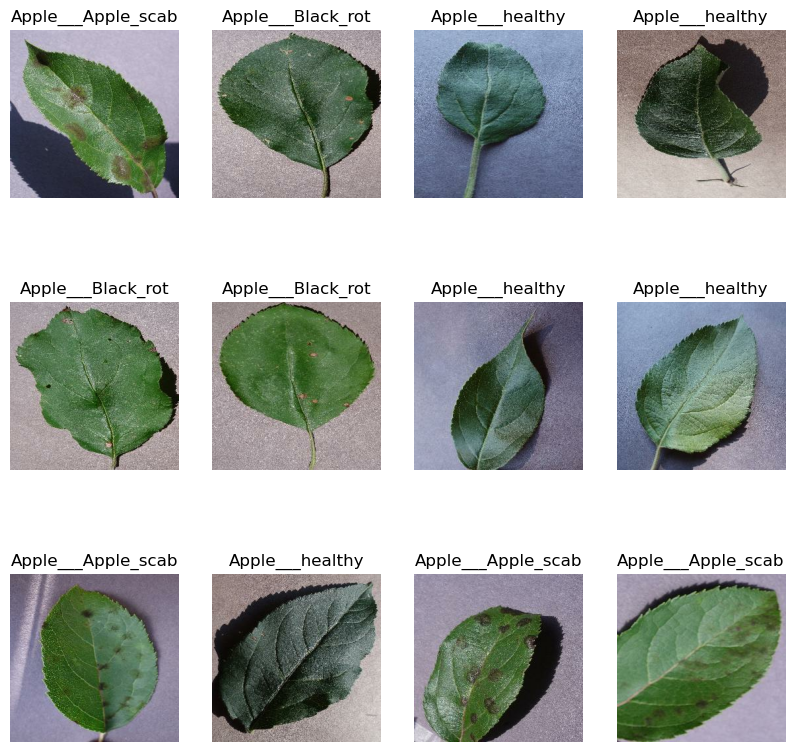

In [16]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [17]:
len(dataset)

100

In [19]:
# 80% ==> training
# 20% ==> 10% validation 10% test

In [26]:
train_size = 0.8
train_data = int(len(dataset)*train_size)

In [29]:
train_ds = dataset.take(train_data) 
len(train_ds)

80

In [30]:
test_ds = dataset.skip(train_data)
len(test_ds)

20

In [32]:
val_size = 0.1
val_data = int(len(dataset) * val_size)
# print(val_data)

10


In [36]:
val_ds = test_ds.take(val_data)
len(val_ds)

10

In [37]:
test_ds = test_ds.skip(10)
len(test_ds)

10

In [ ]:
def get_dataset_partitions(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [39]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

80
10
10


In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [43]:
data_augementation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])